In [13]:
import torch
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx


# Santiago Downtown

In [22]:
data = torch.load('Data/santiago_downtown_ismt.pt')
data.lat = data.x[:, 0]
data.lon = data.x[:, 1]
data.y = data.x[:,-1] # Select GSE
data.x = data.x[:, 2:8]
print(data)
print(data.y)
print(data.lon)
print(data.lat)


Data(x=[56766, 6], edge_index=[2, 96737], edge_attributes=[96737, 2], lat=[56766], lon=[56766], y=[56766])
tensor([1., 1., 1.,  ..., 1., 1., 1.])
tensor([-70.6424, -70.6432, -70.6463,  ..., -70.5807, -70.5811, -70.5852])
tensor([-33.4416, -33.4420, -33.4429,  ..., -33.4390, -33.4389, -33.4386])


## Crear red netowrkx

In [23]:
data.y = torch.where(data.y == 4, 3, data.y)

In [24]:
count_gse = {}
for i in data.y.tolist():
    if i not in count_gse:
        count_gse[i] = 0
    count_gse[i] += 1
count_gse

{1.0: 18911, 2.0: 12066, 3.0: 21595, 0.0: 4194}

In [25]:
# Suponiendo que data contiene tus datos
edge_index = data.edge_index
edge_attributes = data.edge_attributes
labels = data.y
latitudes = data.lat
longitudes = data.lon

# Crear un objeto de red dirigida utilizando networkx
G = nx.DiGraph()

# Agregar nodos al grafo con latitud, longitud y etiqueta
for i in range(len(latitudes)):
    G.add_node(i, pos=(longitudes[i].item(), latitudes[i].item()), label=int(labels[i]))

# Obtener posiciones de los nodos para la visualización
node_positions = {node: data['pos'] for node, data in G.nodes(data=True)}

# Obtener etiquetas de los nodos para la visualización
node_labels = {node: data['label'] for node, data in G.nodes(data=True)}

# Obtener colores de acuerdo a las etiquetas
label_to_color = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple'}
node_colors = [label_to_color[node_labels[node]] for node in G.nodes()]

## Visualizar

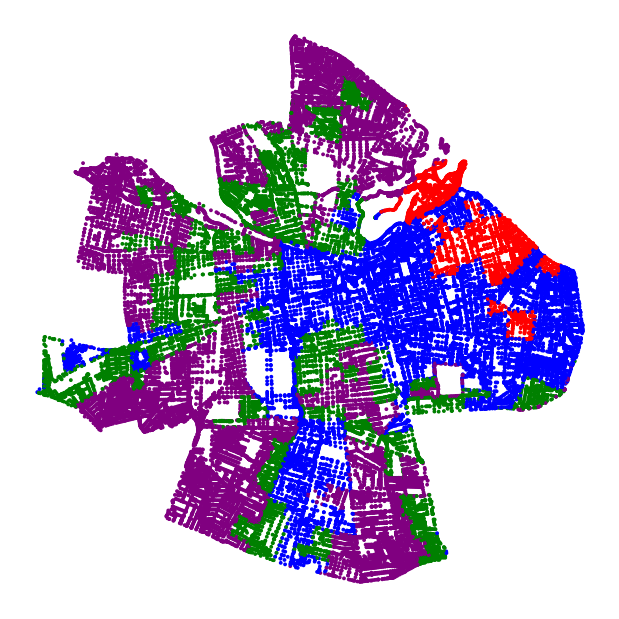

In [30]:
plt.figure(figsize=(6, 6))
nx.draw(G, pos=node_positions, node_color=node_colors, with_labels=False, node_size=3)
plt.show()

# Santiago Full Graphs

In [31]:
data = torch.load('Data/santiago_zero_ismt.pt')
data.lat = data.x[:, 0]
data.lon = data.x[:, 1]
data.y = data.x[:,-1] # Select GSE
data.x = data.x[:, 2:8]
print(data)
print(data.y)
print(data.lon)
print(data.lat)

Data(x=[337374, 6], edge_index=[2, 641693], edge_attributes=[641693, 2], lat=[337374], lon=[337374], y=[337374])
tensor([1., 1., 1.,  ..., 1., 1., 1.])
tensor([-70.6424, -70.6432, -70.6463,  ..., -70.5807, -70.5811, -70.5852])
tensor([-33.4416, -33.4420, -33.4429,  ..., -33.4390, -33.4389, -33.4386])


## Crear grafo

In [35]:
data.y = torch.where(data.y == 4, 3, data.y)

In [37]:
count_gse = {}
for i in data.y.tolist():
    if i not in count_gse:
        count_gse[i] = 0
    count_gse[i] += 1
count_gse

{1.0: 81492, 2.0: 75116, 3.0: 131223, 0.0: 49543}

In [38]:
# Suponiendo que data contiene tus datos
edge_index = data.edge_index
edge_attributes = data.edge_attributes
labels = data.y
latitudes = data.lat
longitudes = data.lon

# Crear un objeto de red dirigida utilizando networkx
G = nx.DiGraph()

# Agregar nodos al grafo con latitud, longitud y etiqueta
for i in range(len(latitudes)):
    G.add_node(i, pos=(longitudes[i].item(), latitudes[i].item()), label=int(labels[i]))

# Obtener posiciones de los nodos para la visualización
node_positions = {node: data['pos'] for node, data in G.nodes(data=True)}

# Obtener etiquetas de los nodos para la visualización
node_labels = {node: data['label'] for node, data in G.nodes(data=True)}

# Obtener colores de acuerdo a las etiquetas
label_to_color = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple'}
node_colors = [label_to_color[node_labels[node]] for node in G.nodes()]

## Visualizar

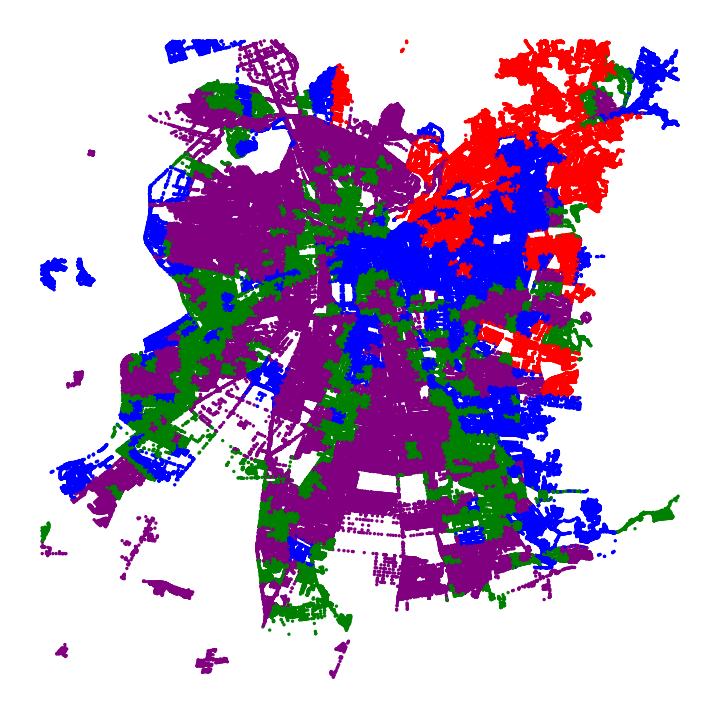

In [40]:
plt.figure(figsize=(7,7))
nx.draw(G, pos=node_positions, node_color=node_colors, with_labels=False, node_size=2)
plt.show()